In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [7]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [19]:
training_set=df['Open'].values

#predicting only the opening values of stock.

In [33]:
#training_set.reshape(-1,1).shape

(1258, 1)

In [36]:
training_set=np.expand_dims(training_set,1)
#reshaping the data in the format needed by MinMaxScaler

In [37]:
training_set.shape

(1258, 1)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
sc=MinMaxScaler()

In [39]:
training_set_scaled=sc.fit_transform(training_set)

In [41]:
training_set_scaled.shape

(1258, 1)

In [57]:
#looking back 60 time steps(days) to predict the present day stock price

X_train=[]
y_train=[]
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
    
    
    
    

In [60]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [62]:
X_train.shape

(1198, 60)

In [66]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [67]:
X_train.shape

(1198, 60, 1)

In [68]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *


In [71]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))         #REGRESSION LAYER

model.compile(optimizer='adam',loss='mse')

In [72]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - ETA: 0s - loss: 0.038 - 14s 12ms/sample - loss: 0.0377
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 5s 5ms/sample - loss: 0.0062
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0065
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0049
Epoc

1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/sample - loss: 0.0016


In [73]:
df2=pd.read_csv('Google_Stock_Price_Test.csv')
#test data

In [74]:
df2.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [76]:
real_stock_price=df2['Open'].values

In [90]:
df_total=pd.concat([df['Open'],df2['Open']])

#concatenate testing n training data into one dataframe to populate the testing data as it needs to have past 60 days
#data to predict the present price of teh stock

In [91]:
df_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [95]:
inputs=df_total[len(df_total)-len(df2)-60:].values

In [97]:
inputs.shape

(80,)

In [99]:
inputs=inputs.reshape(-1,1)

In [100]:
inputs.shape

(80, 1)

In [101]:
inputs=sc.transform(inputs)
#scaling the test data

In [104]:
X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    
X_test=np.array(X_test)

In [108]:
X_test=X_test.reshape(20,60,-1)
#reshaping the data into desired format for predict function

In [109]:
X_test.shape

(20, 60, 1)

In [110]:
predicted_stock_price=model.predict(X_test)
#scaling back the predictions because the model was trained to predict the scaled values of stock
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [112]:
predicted_stock_price.shape

(20, 1)

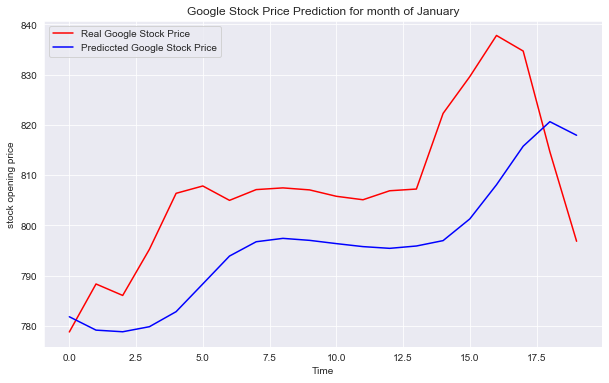

In [119]:
plt.figure(figsize=(10,6))
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Prediccted Google Stock Price')
plt.title('Google Stock Price Prediction for month of January')
plt.xlabel('Time')
plt.ylabel('stock opening price')
plt.legend()
